In [2]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import normalize, scale
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('heart.csv', header=None)
df = pd.DataFrame(data)

In [4]:
x = df.iloc[:, 0:5]
x = x.drop(x.columns[1:3], axis=1)
x = pd.DataFrame(scale(x))

y = df.iloc[:, 13]
y = y - 1

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [6]:
model = KNeighborsClassifier(n_neighbors=5, weights='distance')
model.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [7]:
scores = cross_val_score(model, x, y, scoring='accuracy', cv=10)
print("10-Fold Accuracy:", scores.mean() * 100)

10-Fold Accuracy: 94.19799498746868


In [8]:
testing_accuracy = model.score(x_test, y_test) * 100
print("Testing Accuracy:", testing_accuracy)

Testing Accuracy: 77.97356828193833


In [9]:
predicted = model.predict(x)
cm = metrics.confusion_matrix(y, predicted)

In [10]:
print(cm / len(y))
print(metrics.classification_report(y, predicted))

[[0.51499118 0.03174603]
 [0.05643739 0.3968254 ]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       310
           1       0.93      0.88      0.90       257

    accuracy                           0.91       567
   macro avg       0.91      0.91      0.91       567
weighted avg       0.91      0.91      0.91       567



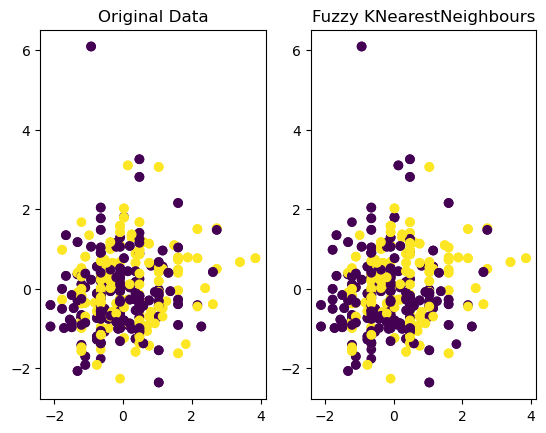

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(x[1], x[2], c=y)
ax1.set_title("Original Data")

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(x[1], x[2], c=predicted)
ax2.set_title("Fuzzy KNearestNeighbours")

plt.show()